# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score,normalized_mutual_info_score,silhouette_score

from sklearn.datasets import fetch_openml
from sklearn.model_selection import ParameterGrid

import openTSNE


# loading the data

In [4]:
train = pd.read_csv('datasets/MNIST/mnist_train.csv')
test = pd.read_csv('datasets/MNIST/mnist_test.csv')

In [20]:
train.shape,test.shape

((60000, 785), (10000, 785))

In [5]:
data=pd.concat([train,test],axis=0)

data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Seperating features and target

In [6]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

# Scaling the features

In [7]:
X=X/255

# Dimensionality Reduction

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
data_tsne = tsne.fit_transform(X_pca)

In [11]:
data_tsne

array([[  4.8287473 ,   0.32605013],
       [  8.613077  ,   4.51196   ],
       [  3.5253162 , -10.804323  ],
       ...,
       [ -3.62849   ,  -8.694285  ],
       [  2.5254536 ,  -3.3636692 ],
       [  8.944224  ,  -3.1639318 ]], dtype=float32)

# Visualizing the clusters by T-sne

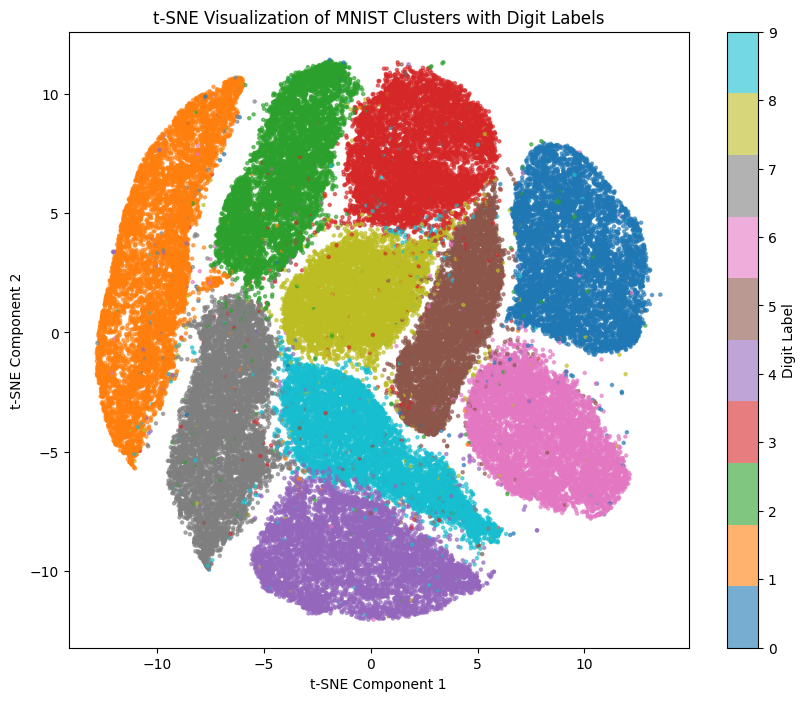

In [13]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y.astype(int), cmap='tab10', s=1, alpha=0.6)  # Adjust size and transparency
plt.title('t-SNE Visualization of MNIST Clusters with Digit Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=range(10), label='Digit Label')  # Color bar for digit labels
plt.grid(False)
plt.show()


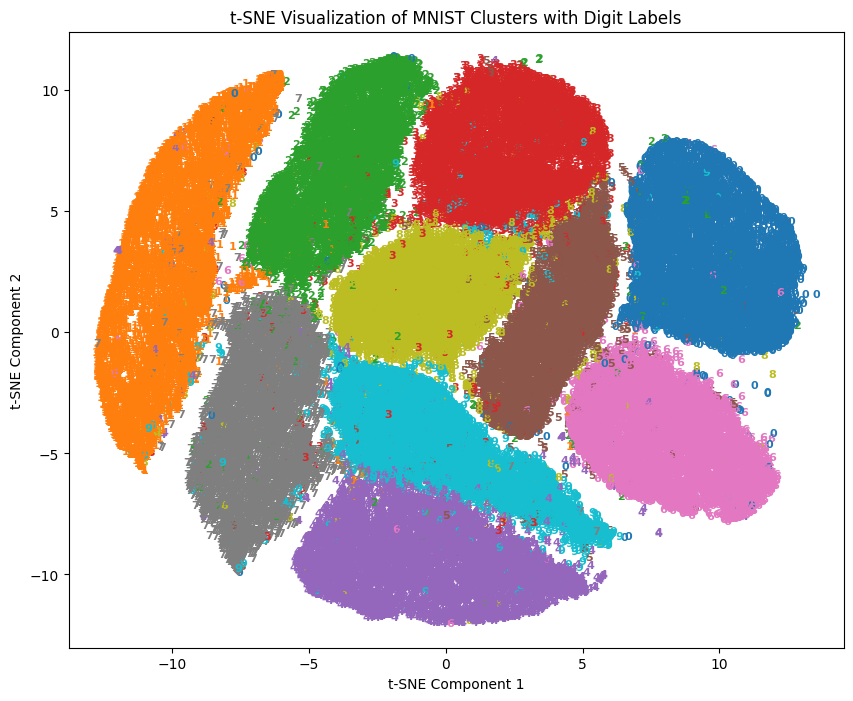

In [14]:

plt.figure(figsize=(10, 8))
for i in range(data_tsne.shape[0]):
    plt.text(data_tsne[i, 0], data_tsne[i, 1], str(y.iloc[i]),color=plt.cm.tab10(int(y.iloc[i]) / 10), fontdict={'weight': 'bold', 'size': 8}, ha='center', va='center')  # Center the text
             
plt.title('t-SNE Visualization of MNIST Clusters with Digit Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(False)
plt.xlim(data_tsne[:, 0].min() - 1, data_tsne[:, 0].max() + 1) 
plt.ylim(data_tsne[:, 1].min() - 1, data_tsne[:, 1].max() + 1)  
plt.show()


# Evaluation Metrics

Adjusted Rand Score (ARI): A measure of similarity between two clusterings, adjusted for chance, ranging from -1 (no agreement) to 1 (perfect agreement).

Normalized Mutual Information (NMI): A metric that quantifies the shared information between two clusterings, normalized to account for the number of clusters, ranging from 0 (no shared information) to 1 (perfect correlation).

In [12]:
def evaluate_clustering(labels, y_true):
    ari = adjusted_rand_score(y_true, labels)
    nmi = normalized_mutual_info_score(y_true, labels)
    print(f"ARI: {ari:.3f}, NMI: {nmi:.3f}")
    return ari, nmi

# Hyperparameter tuning for K-Means

Tuning KMeans...
Parameters: {'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 5, 'n_init': 10} | ARI: 0.330, NMI: 0.465, Silhouette Score: 0.088
Parameters: {'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 5, 'n_init': 20} | ARI: 0.330, NMI: 0.465, Silhouette Score: 0.088
Parameters: {'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 5, 'n_init': 30} | ARI: 0.330, NMI: 0.465, Silhouette Score: 0.088
Parameters: {'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 7, 'n_init': 10} | ARI: 0.358, NMI: 0.470, Silhouette Score: 0.090
Parameters: {'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 7, 'n_init': 20} | ARI: 0.357, NMI: 0.470, Silhouette Score: 0.090
Parameters: {'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 7, 'n_init': 30} | ARI: 0.357, NMI: 0.470, Silhouette Score: 0.090
Parameters: {'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 8, 'n_init': 10} | ARI: 0.396, NMI: 0.505, Silhouette Score: 0.098
Parameters: {'algorithm'

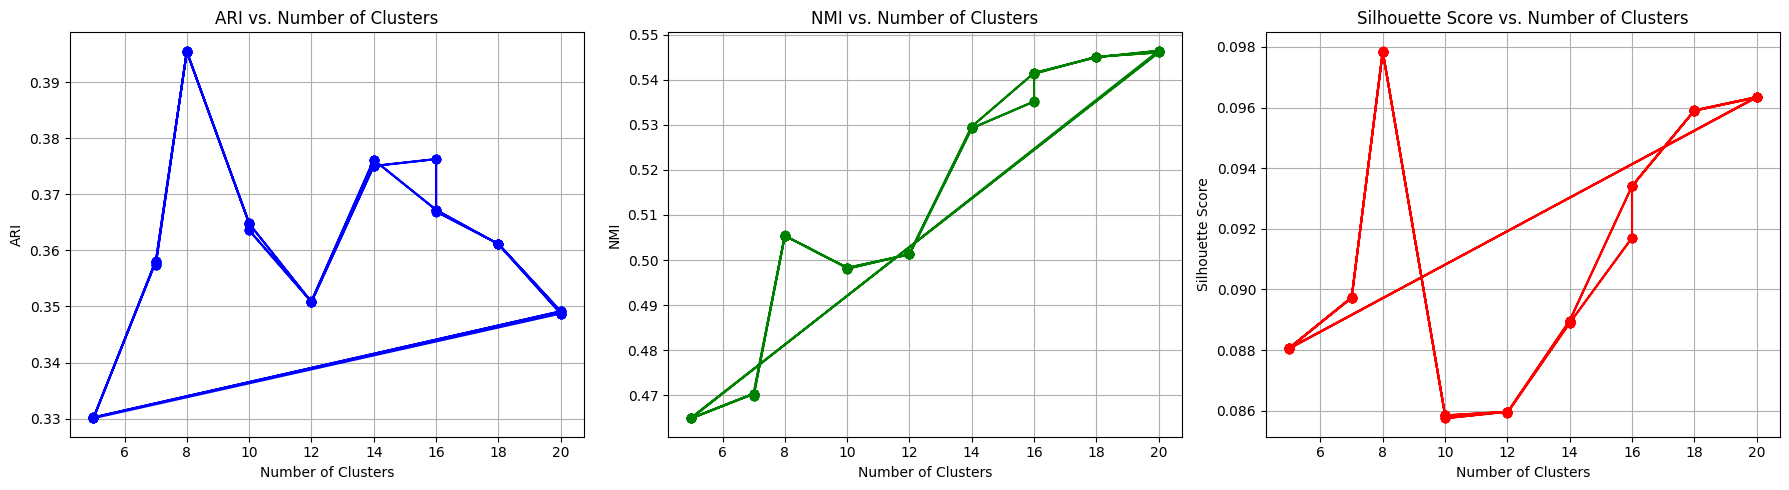

In [28]:
def tune_kmeans(X, y):
    best_ari = -1
    best_params = None
    ari_scores = []
    nmi_scores = []
    silhouette_scores = []
    n_clusters_list = []

    print("Tuning KMeans...")
    param_grid = {
        'n_clusters': [5, 7, 8, 10, 12, 14, 16, 18, 20],
        'init': ['k-means++', 'random'],
        'n_init': [10, 20, 30],
        'algorithm': ['elkan','lloyd']
    }

    for params in ParameterGrid(param_grid):
        kmeans = KMeans(**params, random_state=42)
        labels = kmeans.fit_predict(X)

        ari = adjusted_rand_score(y, labels)
        nmi = normalized_mutual_info_score(y, labels)
        silhouette = silhouette_score(X, labels)

        ari_scores.append(ari)
        nmi_scores.append(nmi)
        silhouette_scores.append(silhouette)
        n_clusters_list.append(params['n_clusters'])

        print(f"Parameters: {params} | ARI: {ari:.3f}, NMI: {nmi:.3f}, Silhouette Score: {silhouette:.3f}")

        if ari > best_ari:
            best_ari = ari   # Updating the best score
            best_params = params

    print(f"\nBest KMeans ARI: {best_ari:.3f} with params: {best_params}")
    
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    plt.plot(n_clusters_list, ari_scores, marker='o', color='b', label='ARI')
    plt.xlabel('Number of Clusters')
    plt.ylabel('ARI')
    plt.title('ARI vs. Number of Clusters')
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(n_clusters_list, nmi_scores, marker='o', color='g', label='NMI')
    plt.xlabel('Number of Clusters')
    plt.ylabel('NMI')
    plt.title('NMI vs. Number of Clusters')
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(n_clusters_list, silhouette_scores, marker='o', color='r', label='Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    return best_params, best_ari

best_params, best_ari = tune_kmeans(X_pca, y)


# K means for 2 principal components

KMeans Clustering - ARI: 0.232, NMI: 0.355


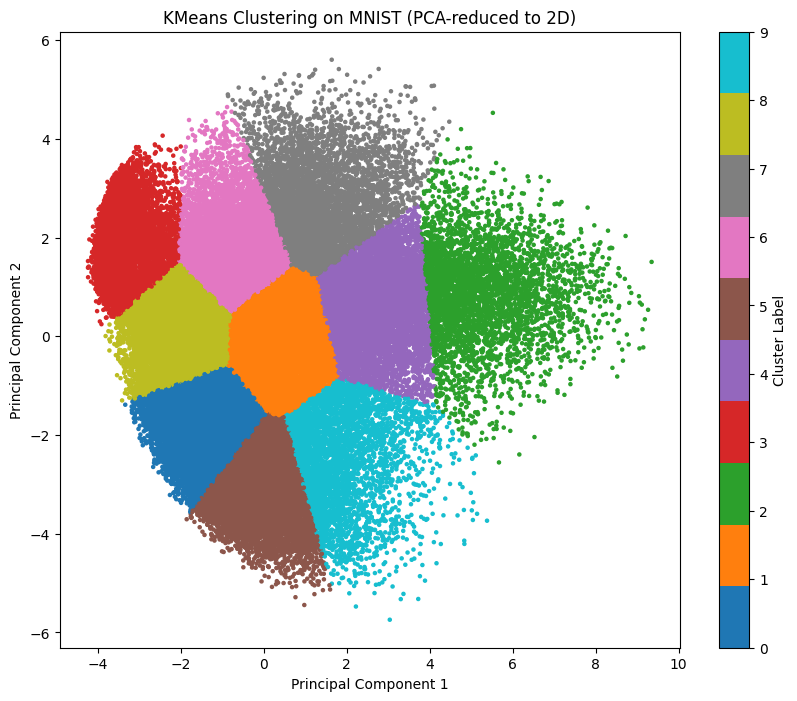

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

ari = adjusted_rand_score(y, kmeans_labels)
nmi = normalized_mutual_info_score(y, kmeans_labels)
print(f"KMeans Clustering - ARI: {ari:.3f}, NMI: {nmi:.3f}")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10', s=5)
plt.colorbar(scatter, label="Cluster Label")
plt.title("KMeans Clustering on MNIST (PCA-reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# visualizing clusters for different k values

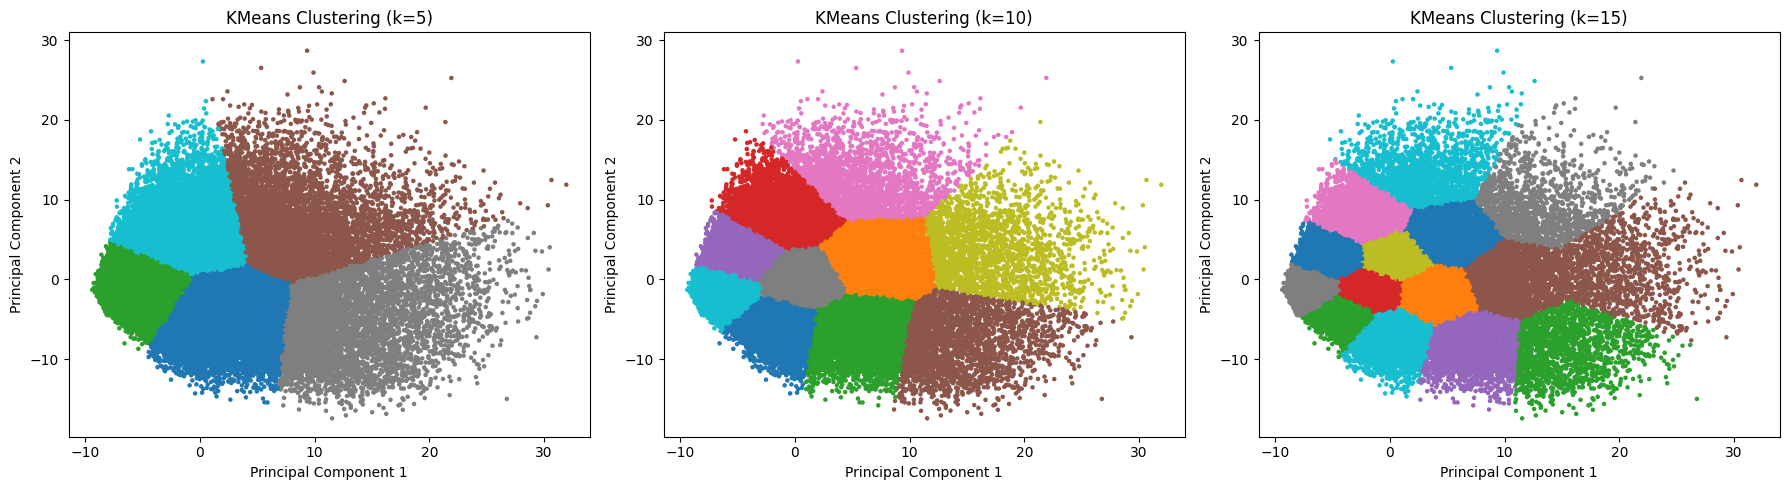

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

k_values = [5, 10, 15]

plt.figure(figsize=(18, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)
    
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10', s=5)
    plt.title(f'KMeans Clustering (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Inertia vs No. of Clusters

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


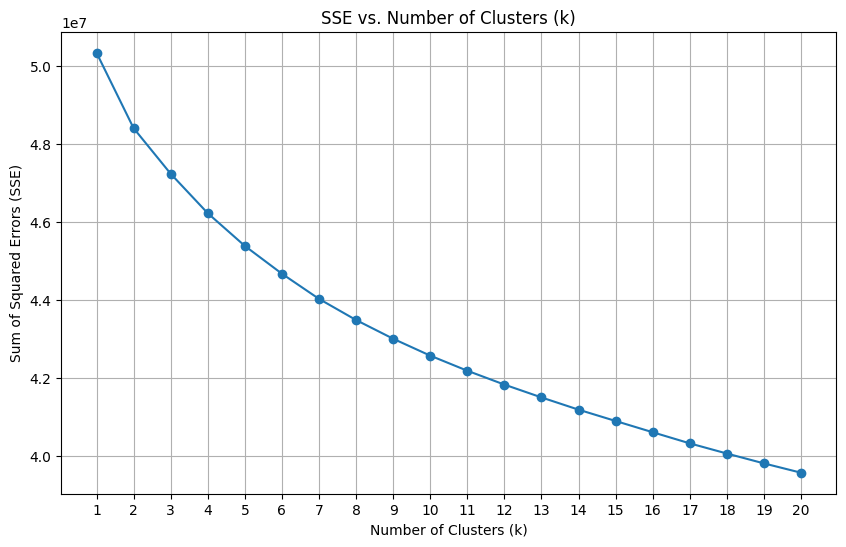

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

k_values = range(1, 21)  
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)  
    sse.append(kmeans.inertia_) 
    print(k)
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('SSE vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid()
plt.show()

# Training on sampled dataset

Number of data points for each digit is 1000

Silhouette Scores:
K-Means: 0.0669
Agglomerative: 0.0269


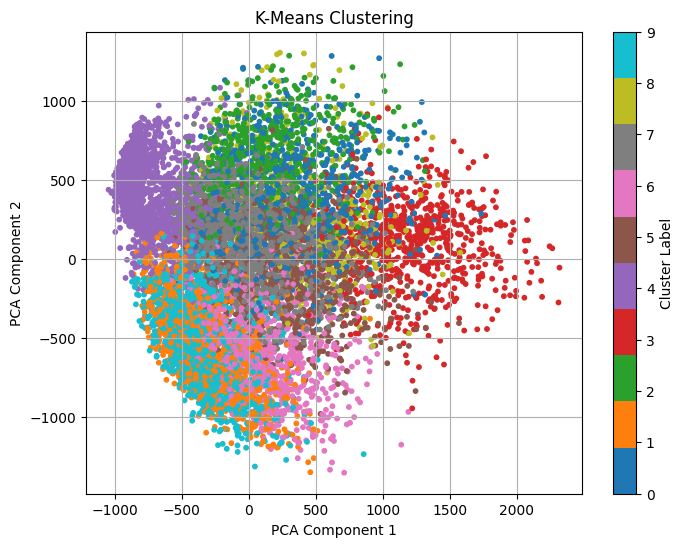

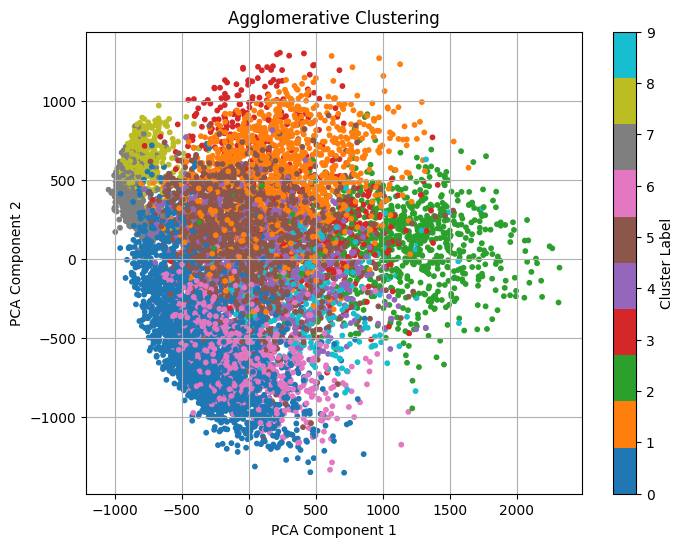

In [11]:
samples_per_digit = 1000  
equal_samples = []

for digit in range(10):
    digit_samples = data[data.iloc[:, 0] == digit].sample(n=samples_per_digit, random_state=42)
    equal_samples.append(digit_samples)

equal_data = pd.concat(equal_samples)

x_equal = equal_data.iloc[:, 1:].values
y_equal = equal_data.iloc[:, 0].values

# K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(x_equal)

# DBSCAN clustering
# dbscan = DBSCAN(eps=0.005, min_samples=5)
# dbscan_labels = dbscan.fit_predict(x_equal)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=10)
agglo_labels = agglo.fit_predict(x_equal)

# silhouette score
scores = {
    'K-Means': silhouette_score(x_equal, kmeans_labels),
    'Agglomerative': silhouette_score(x_equal, agglo_labels),
}

print("Silhouette Scores:")
for method, score in scores.items():
    print(f"{method}: {score:.4f}")

def plot_clusters(x, labels, title):
    pca = PCA(n_components=2)
    reduced_x = pca.fit_transform(x)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=labels, cmap='tab10', marker='o', s=10)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter, ticks=range(10), label='Cluster Label')
    plt.grid()
    plt.show()

plot_clusters(x_equal, kmeans_labels, "K-Means Clustering")
plot_clusters(x_equal, agglo_labels, "Agglomerative Clustering")

# Visualizing cluster centers

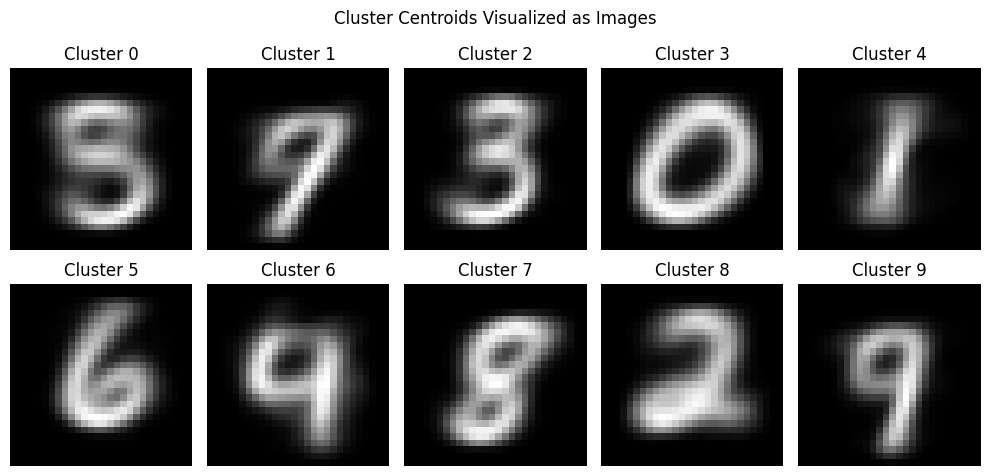

In [32]:

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_equal)

centroids = kmeans.cluster_centers_

# Plot the cluster centroids
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    centroid_image = centroids[i].reshape(28, 28)    # Reshape the data to 28x28
    axes[i].imshow(centroid_image, cmap='gray')
    axes[i].set_title(f'Cluster {i}')
    axes[i].axis('off')

plt.suptitle("Cluster Centroids Visualized as Images")
plt.tight_layout()
plt.show()

# NOTE: cluster i donot correspond to digit i

# Purity of clusters

In [12]:
def calculate_purity(labels, y_true):
    contingency_matrix = np.zeros((np.unique(labels).shape[0], np.unique(y_true).shape[0]))
    
    for i in range(len(labels)):
        contingency_matrix[labels[i], y_true[i]] += 1
    
    max_cluster_counts = np.sum(np.amax(contingency_matrix, axis=1))
    purity = max_cluster_counts / len(labels)
    return purity

purity_kmeans = calculate_purity(kmeans_labels, y_equal)
purity_agglo = calculate_purity(agglo_labels, y_equal)

print(f"K-Means Purity: {purity_kmeans:.4f}")
print(f"Agglomerative Clustering Purity: {purity_agglo:.4f}")


K-Means Purity: 0.5801
Agglomerative Clustering Purity: 0.6916


In [13]:
def calculate_purity_per_digit(labels, y_true, n_digits=10):
    digit_purity = {}
    
    for digit in range(n_digits):
        digit_indices = (y_true == digit)
        digit_labels = labels[digit_indices]
        
        most_common_cluster = np.argmax(np.bincount(digit_labels))
        
        correct_count = np.sum(digit_labels == most_common_cluster)
        digit_purity[digit] = correct_count / np.sum(digit_indices)
    
    return digit_purity

purity_per_digit_kmeans = calculate_purity_per_digit(kmeans_labels, y_equal)
purity_per_digit_agglo = calculate_purity_per_digit(agglo_labels, y_equal)

print("Purity per Digit for K-Means:")
for digit, purity in purity_per_digit_kmeans.items():
    print(f"Digit {digit}: {purity:.4f}")

print("\nPurity per Digit for Agglomerative Clustering:")
for digit, purity in purity_per_digit_agglo.items():
    print(f"Digit {digit}: {purity:.4f}")


Purity per Digit for K-Means:
Digit 0: 0.7930
Digit 1: 0.9760
Digit 2: 0.6930
Digit 3: 0.4930
Digit 4: 0.3970
Digit 5: 0.2640
Digit 6: 0.7380
Digit 7: 0.4730
Digit 8: 0.5390
Digit 9: 0.4030

Purity per Digit for Agglomerative Clustering:
Digit 0: 0.9510
Digit 1: 0.5900
Digit 2: 0.8920
Digit 3: 0.9020
Digit 4: 0.4970
Digit 5: 0.4530
Digit 6: 0.6930
Digit 7: 0.9560
Digit 8: 0.7730
Digit 9: 0.6480


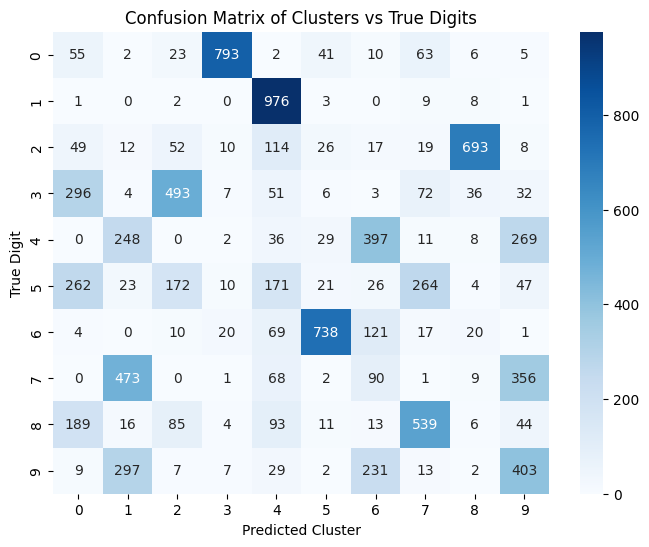

In [19]:

def plot_confusion_matrix(labels, y_true):
    cm = confusion_matrix(y_true, labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Cluster")
    plt.ylabel("True Digit")
    plt.title("Confusion Matrix of Clusters vs True Digits")
    plt.show()

plot_confusion_matrix(kmeans_labels, y_equal)


# Silhouette Analysis for Optimal k

k=2, Silhouette Score: 0.0599
k=3, Silhouette Score: 0.0691
k=4, Silhouette Score: 0.0779
k=5, Silhouette Score: 0.0881
k=6, Silhouette Score: 0.0875
k=7, Silhouette Score: 0.0706
k=8, Silhouette Score: 0.0979
k=9, Silhouette Score: 0.0827
k=10, Silhouette Score: 0.0817
k=11, Silhouette Score: 0.0823
k=12, Silhouette Score: 0.0856
k=13, Silhouette Score: 0.0861
k=14, Silhouette Score: 0.0876
k=15, Silhouette Score: 0.0887


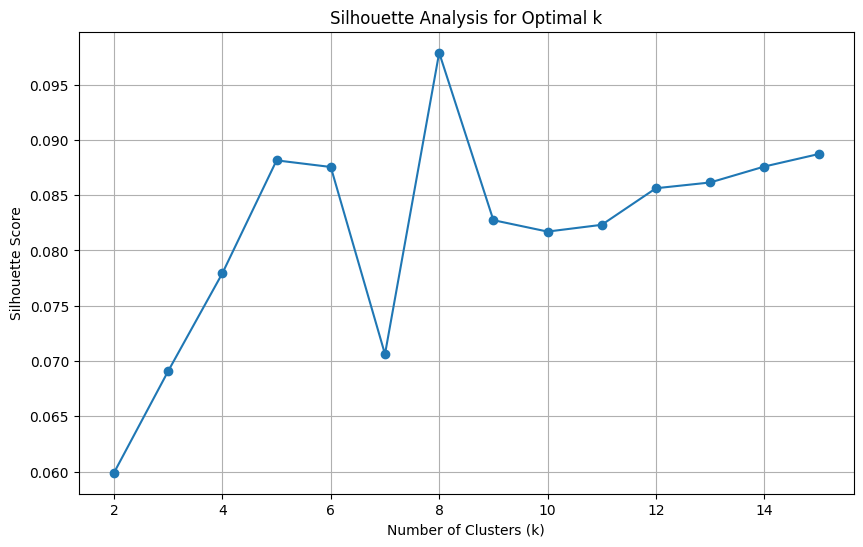

In [18]:
def silhouette_analysis(X, max_k=15):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
        print(f"k={k}, Silhouette Score: {score:.4f}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis for Optimal k')
    plt.grid()
    plt.show()

silhouette_analysis(X_pca)


# Other clustering algorithms

In [13]:


def calculate_purity_per_digit(labels, y_true, n_digits=10):
    digit_purity = {}
    
    for digit in range(n_digits):
        digit_indices = (y_true == digit)
        digit_labels = labels[digit_indices]
        
        most_common_cluster = np.argmax(np.bincount(digit_labels))
        
        correct_count = np.sum(digit_labels == most_common_cluster)
        digit_purity[digit] = correct_count / np.sum(digit_indices)
    
    return digit_purity

gmm = GaussianMixture(n_components=10, random_state=42)
gmm_labels = gmm.fit_predict(X)  

purity_per_digit_gmm = calculate_purity_per_digit(gmm_labels, y)  
print("Purity per Digit for GMM:")
for digit, purity in purity_per_digit_gmm.items():
    print(f"Digit {digit}: {purity:.4f}")

print("\nGaussian Mixture Model (GMM) Clustering:")
evaluate_clustering(gmm_labels, y)  


Purity per Digit for GMM:
Digit 0: 0.6755
Digit 1: 0.7884
Digit 2: 0.3881
Digit 3: 0.2624
Digit 4: 0.3222
Digit 5: 0.5848
Digit 6: 0.7118
Digit 7: 0.5238
Digit 8: 0.4954
Digit 9: 0.5934

Gaussian Mixture Model (GMM) Clustering:
ARI: 0.235, NMI: 0.354


NameError: name 'plot_clusters' is not defined

In [14]:
def plot_clusters(x, labels, title):
    pca = PCA(n_components=2)
    reduced_x = pca.fit_transform(x)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=labels, cmap='tab10', marker='o', s=10)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter, ticks=range(10), label='Cluster Label')
    plt.grid()
    plt.show()

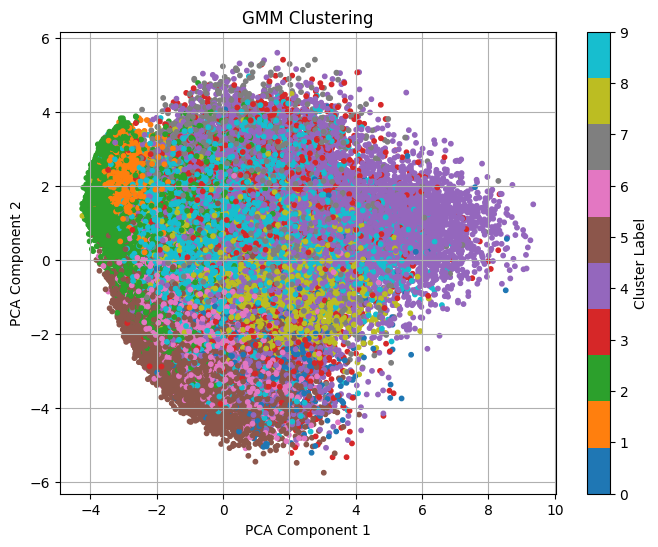

In [15]:
plot_clusters(X_pca, gmm_labels, "GMM Clustering")  
